In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from utils.dataset import load_datasets_by_language

In [87]:
path_to_training_set   = "data/raw_training_set.pkl"
path_to_validation_set = "data/raw_validation_set.pkl"
all_datasets_raw = load_datasets_by_language(path_to_training_set, path_to_validation_set)

## A.

In [72]:
def compute_comparison_between_two_binary_QA_models(y1, y2, y_true):
    w1 = y1 != y_true
    c1 = y1 == y_true

    c2 = y2 == y_true
    w2 = y2 != y_true

    c_w = c1 & w2
    w_c = w1 & c2
    w_w = w1 & w2
    c_c = c1 & c2 # Of those that are correct in m1, how many are also correct in m2

    cf = np.array([[c_c, c_w], [w_c, w_w]]).sum(axis=2)

    index_c_c = np.argwhere(c_c).squeeze()
    index_c_w = np.argwhere(c_w).squeeze()
    index_w_c = np.argwhere(w_c).squeeze()
    index_w_w = np.argwhere(w_w).squeeze()

    return cf, index_c_c, index_c_w, index_w_c, index_w_w

In [104]:
def interpretate_binary_QA_model_comparison(cf, model1_name: str = "Model 1", model2_name: str = "Model 2"):
    print(f"Of the correct prediction made by model 1, how many are correct in model 2? {cf[0,0]}")
    print(f"Of the correct prediction made by model 1, how many are wrong in model 2?   {cf[0,1]}")
    print(f"Of the wrong prediction made by model 1,   how many are correct in model 2? {cf[1,0]}")
    print(f"Of the wrong prediction made by model 1,   how many are wrong in model 2?   {cf[1,1]}")
    
    df = pd.DataFrame(cf, columns = ['Correct','Wrong'], index=["Correct", "Wrong"])
    ax = sns.heatmap(df, annot=True, cbar=False)
    ax.set_ylabel("Model 1")
    ax.set_xlabel("Model 2")
    ax.set_title("Binary QA model comparison")
    plt.show()

Of the correct prediction made by model 1, how many are correct in model 2? 13
Of the correct prediction made by model 1, how many are wrong in model 2?   57
Of the wrong prediction made by model 1,   how many are correct in model 2? 30
Of the wrong prediction made by model 1,   how many are wrong in model 2?   0


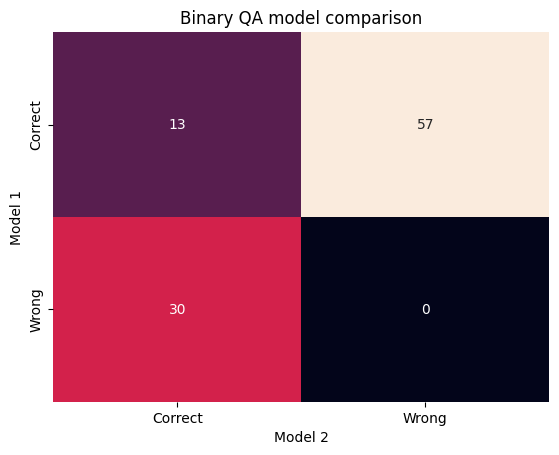

In [105]:
X = np.random.rand(100)
y_true = np.ones(100)

y1 = np.concatenate((np.ones(70), np.zeros(30)))
y2 = np.concatenate((np.zeros(57), np.ones(43)))

cf, index_c_c, index_c_w, index_w_c, index_w_w = compute_comparison_between_two_binary_QA_models(y1, y2, y_true)
interpretate_binary_QA_model_comparison(cf)

In [97]:
def inspect(dataset, indices):
    selected = dataset.iloc[indices]
    return selected

In [98]:
inspect(all_datasets_raw["en"]["validation"], index_c_c)

,question_text,document_title,language,annotations,document_plaintext,document_url
876,On what day did Jesus die?,Chronology of Jesus,english,"{'answer_start': [735], 'answer_text': ['3 Apr...",Five methods have been used to estimate the da...,https://en.wikipedia.org/wiki/Chronology%20of%...
882,Who invented fantasy sports?,Fantasy sport,english,"{'answer_start': [268], 'answer_text': ['Wilfr...",The concept of picking players and running a c...,https://en.wikipedia.org/wiki/Fantasy%20sport
897,How many people live in Dallas?,Demographics of Dallas,english,"{'answer_start': [40], 'answer_text': ['1,188,...","As of the census[1] of 2000, there were 1,188,...",https://en.wikipedia.org/wiki/Demographics%20o...
918,When was social psychology first practiced?,Social psychology,english,"{'answer_start': [248], 'answer_text': ['20th ...",Although there were some older writings about ...,https://en.wikipedia.org/wiki/Social%20psychology
924,What English word has the most syllables?,Longest word in English,english,"{'answer_start': [70], 'answer_text': ['pneumo...",The longest word in any of the major English l...,https://en.wikipedia.org/wiki/Longest%20word%2...
937,How long is the Three Gorges Dam?,Three Gorges Dam,english,"{'answer_start': [39], 'answer_text': ['2,335m']}","Made of concrete and steel, the dam is 2,335m ...",https://en.wikipedia.org/wiki/Three%20Gorges%2...
980,When was the Polish–Lithuanian Commonwealth es...,Polish–Lithuanian Commonwealth,english,"{'answer_start': [126], 'answer_text': ['1791']}","The Polish–Lithuanian Commonwealth – formally,...",https://en.wikipedia.org/wiki/Polish%E2%80%93L...
1010,What is the most common type of rock on Earth?,Rock (geology),english,"{'answer_start': [55], 'answer_text': ['igneou...",About 64.7% of the Earth's crust by volume con...,https://en.wikipedia.org/wiki/Rock%20%28geolog...
1022,What or who was the Meiji Restoration named for?,Meiji Restoration,english,"{'answer_start': [197], 'answer_text': ['Emper...","The Meiji Restoration(明治維新,Meiji Ishin), also ...",https://en.wikipedia.org/wiki/Meiji%20Restoration
1037,How long did Beetleborgs air for?,Big Bad Beetleborgs,english,"{'answer_start': [223], 'answer_text': ['two s...",Big Bad Beetleborgs (later Beetleborgs Metalli...,https://en.wikipedia.org/wiki/Big%20Bad%20Beet...


In [88]:
all_datasets_raw["en"]["validation"]

,question_text,document_title,language,annotations,document_plaintext,document_url
30,What is a way to increase your wound healing s...,Wound healing,english,"{'answer_start': [51], 'answer_text': ['cleani...",Wound care encourages and speeds wound healing...,https://en.wikipedia.org/wiki/Wound%20healing
47,Who founded the Burntisland Shipbuilding Company?,Burntisland Shipbuilding Company,english,"{'answer_start': [0], 'answer_text': ['Brother...",Brothers Amos and Wilfrid Ayre founded Burntis...,https://en.wikipedia.org/wiki/Burntisland%20Sh...
59,What is the surface area of the human cortex?,Cerebral cortex,english,"{'answer_start': [295], 'answer_text': ['2.3–2...","For species of mammals, larger brains (in abso...",https://en.wikipedia.org/wiki/Cerebral%20cortex
77,When did the case of R (Factortame Ltd) v Secr...,R (Factortame Ltd) v Secretary of State for Tr...,english,"{'answer_start': [352], 'answer_text': ['Decem...","As from 31 March 1989, fishing vessel registra...",https://en.wikipedia.org/wiki/R%20%28Factortam...
106,When was Quezon City founded?,Quezon City,english,"{'answer_start': [32], 'answer_text': ['1939']}","When Quezon City was created in 1939, the foll...",https://en.wikipedia.org/wiki/Quezon%20City
...,...,...,...,...,...,...
13276,What's the average income in West Virginia?,List of West Virginia locations by per capita ...,english,"{'answer_start': [-1], 'answer_text': ['']}",Note: County Data is from the 2011–2015 Americ...,https://en.wikipedia.org/wiki/List%20of%20West...
13287,How often do LSAT tests take place?,Law School Admission Test,english,"{'answer_start': [-1], 'answer_text': ['']}",A recent controversy surrounding the LSAT was ...,https://en.wikipedia.org/wiki/Law%20School%20A...
13298,How much does a bushel of barley weigh?,Bushel,english,"{'answer_start': [-1], 'answer_text': ['']}",\nThe Spanish bushel (fanega) was used as a me...,https://en.wikipedia.org/wiki/Bushel
13305,What is the most common first word by babies?,Vocabulary development,english,"{'answer_start': [-1], 'answer_text': ['']}","Social pragmatic theories, also in contrast to...",https://en.wikipedia.org/wiki/Vocabulary%20dev...


## B.

## C.